In [ ]:
# imports
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2gray
import numpy as np
from scipy import signal
import cv2

/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


Text(0.5, 1.0, 'Weighted Lowpass filtered')

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

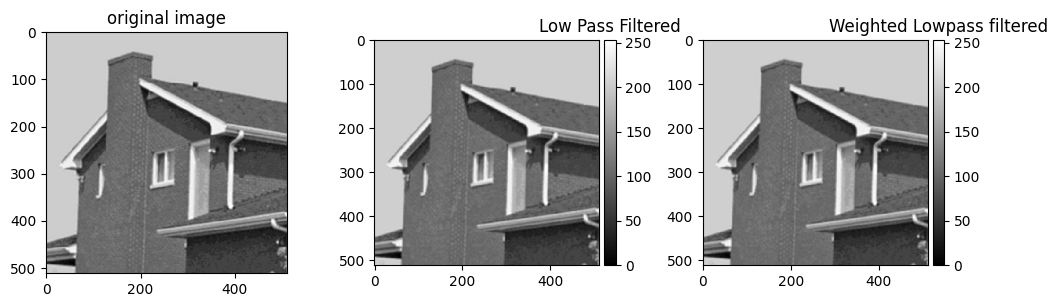

In [ ]:
# Low pass filter in spatial domain

image_ori = io.imread('house.tif')
image=image_ori[:,:,0]  # house.tif has two dimensions

plt.figure()

avg_filter=np.ones((3,3))/9
wght_avg_filter=np.array([[1,2,1],[2,4,2],[1,2,1]])
wght_avg_filter=wght_avg_filter/25

image_avg=image.copy()
image_avg=signal.convolve2d(image,avg_filter,mode='same')

image_wght_avg=image.copy()
image_wght_avg=signal.convolve2d(image,wght_avg_filter,mode='same')

plt.figure()
plt.figure(figsize=(10,10))

plt.subplot(131)
io.imshow(image, cmap='gray')
plt.title('original image')

plt.subplot(132)
io.imshow(image_avg, cmap='gray')
plt.title('Low Pass Filtered')

plt.subplot(133)
io.imshow(image_avg, cmap='gray')
plt.title('Weighted Lowpass filtered')

Text(0.5, 1.0, 'High Pass vert filtered')

<Figure size 640x480 with 0 Axes>

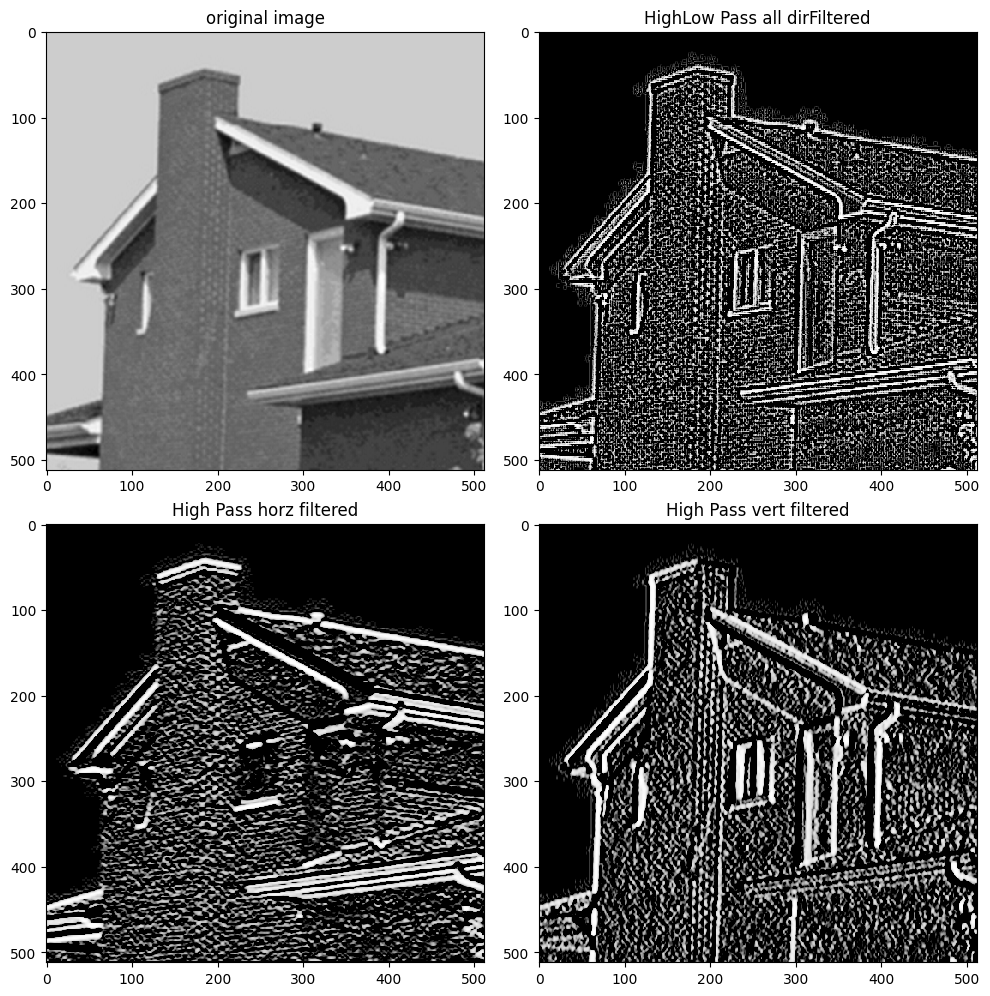

In [ ]:
# High pass filter in spatial domain

high_pass_all_dir=np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])

image_high_all=signal.convolve2d(image,high_pass_all_dir,mode='same')
image_high_all=cv2.filter2D(image,-1,high_pass_all_dir)
eq_image_high_all=cv2.equalizeHist(image_high_all)

high_pass_horz=np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
image_high_horz=cv2.filter2D(image,-1, high_pass_horz)
eq_image_high_horz=cv2.equalizeHist(image_high_horz)

high_pass_vert=np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
image_high_vert=cv2.filter2D(image,-1, high_pass_vert)
eq_image_high_vert=cv2.equalizeHist(image_high_vert)

plt.figure()
plt.figure(figsize=(10,10))

plt.subplot(221)
io.imshow(image, cmap='gray')
plt.title('original image')

plt.subplot(222)
io.imshow(eq_image_high_all, cmap='gray')
plt.title('HighLow Pass all dirFiltered')

plt.subplot(223)
io.imshow(eq_image_high_horz, cmap='gray')
plt.title('High Pass horz filtered')

plt.subplot(224)
io.imshow(eq_image_high_vert, cmap='gray')
plt.title('High Pass vert filtered')

(<Axes: title={'center': 'High Pass Filtered'}>,
 Text(0.5, 1.0, 'High Pass Filtered'))

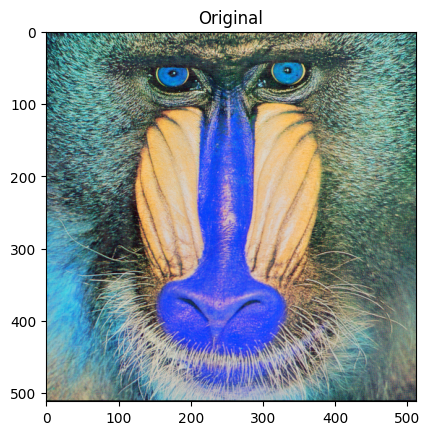

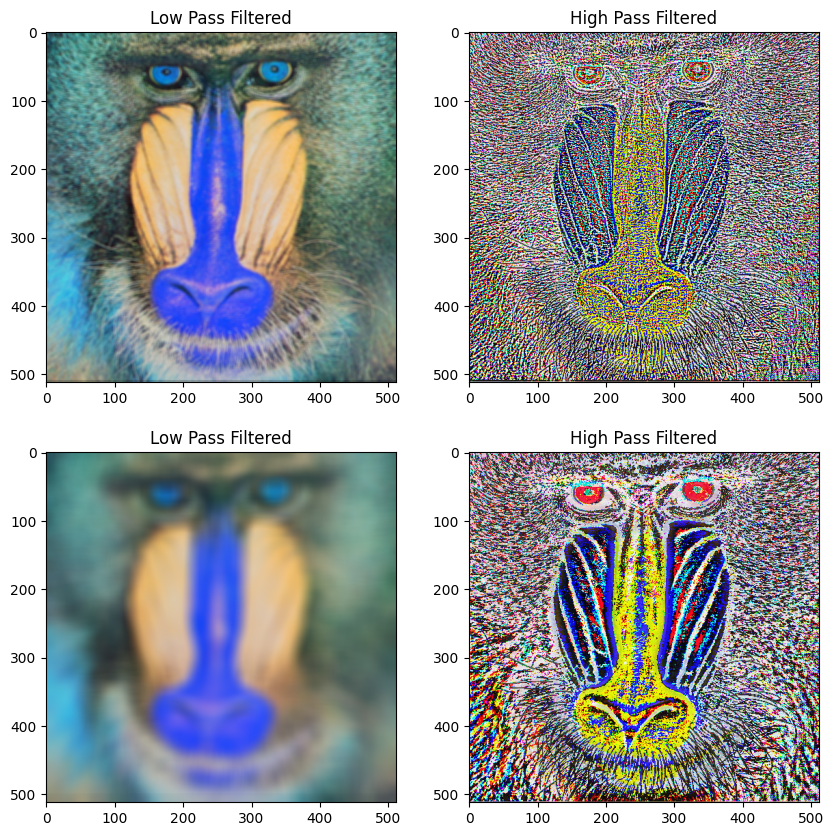

In [ ]:
img = cv2.imread('baboon.png')
img_low=cv2.GaussianBlur(img, (5,5), 10)
img_high=img - img_low

plt.imshow(img)
plt.title('Original')

plt.figure(figsize=(10,10))
plt.subplot(221),plt.imshow(img_low),plt.title('Low Pass Filtered')
plt.subplot(222),plt.imshow(img_high),plt.title('High Pass Filtered')

img_low=cv2.GaussianBlur(img, (25,25), 10)
img_high=img - img_low

plt.subplot(223),plt.imshow(img_low),plt.title('Low Pass Filtered')
plt.subplot(224),plt.imshow(img_high),plt.title('High Pass Filtered')

(<Axes: title={'center': 'High Pass Filtered'}>,
 Text(0.5, 1.0, 'High Pass Filtered'))

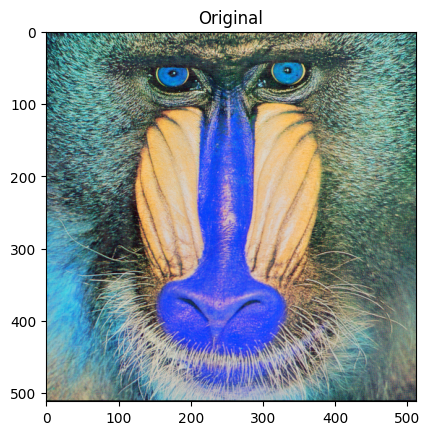

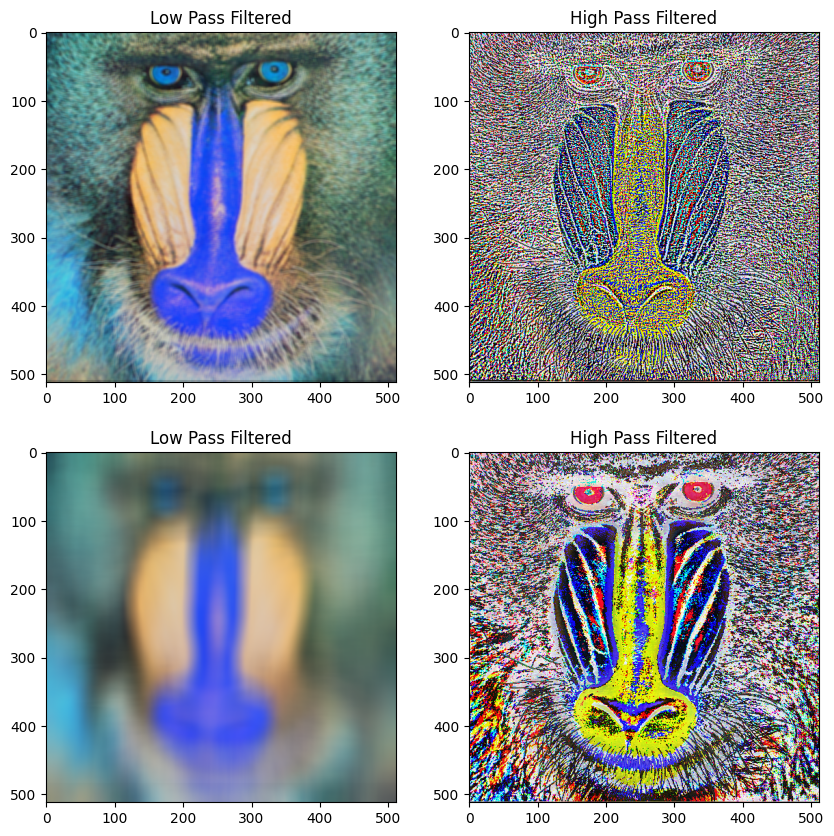

In [ ]:
img_low=cv2.boxFilter(img, -1,(5,5))
img_high=img - img_low

plt.imshow(img)
plt.title('Original')

plt.figure(figsize=(10,10))
plt.subplot(221),plt.imshow(img_low),plt.title('Low Pass Filtered')
plt.subplot(222),plt.imshow(img_high),plt.title('High Pass Filtered')

img_low=cv2.boxFilter(img, -1,(25,55))
img_high=img - img_low

plt.subplot(223),plt.imshow(img_low),plt.title('Low Pass Filtered')
plt.subplot(224),plt.imshow(img_high),plt.title('High Pass Filtered')